In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
import socket
import torch
print(socket.gethostname())
print(torch.cuda.get_device_name(0))

kevin-PC
GeForce GTX 660M


/home/kevin/miniconda2/envs/torch/lib/python3.6/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU0 GeForce GTX 660M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [3]:
"""import net.ddff_net.ddff_net
import torch
import numpy as np
from net.ddff_net.ddff_net import DDFFEncoderNet
from net.ddff_net.ddff_net import DDFFNet

test_img = torch.Tensor(np.random.random_sample((1, 3, 224, 224)))

test_img.unsqueeze_(0)

ddff_net = DDFFNet(1)

with torch.no_grad():
    x = ddff_net(test_img)
    
print(x.size())"""

'import net.ddff_net.ddff_net\nimport torch\nimport numpy as np\nfrom net.ddff_net.ddff_net import DDFFEncoderNet\nfrom net.ddff_net.ddff_net import DDFFNet\n\ntest_img = torch.Tensor(np.random.random_sample((1, 3, 224, 224)))\n\ntest_img.unsqueeze_(0)\n\nddff_net = DDFFNet(1)\n\nwith torch.no_grad():\n    x = ddff_net(test_img)\n    \nprint(x.size())'

In [4]:
import data.data_transforms
import data.mdff_data
from data.mdff_data import MdffData
from data.mdff_data import MdffH5Data
from data.ddff_data import DDFFData
from tools import project

dataset = "DDFFData"
# dataset_type = MdffH5Data
#dataset = "MdffH5Data"


train_data = project.create_component("data", name=dataset, root_dir=proj_dir("datasets"), data_type="train")
val_data = project.create_component("data", name=dataset, root_dir=proj_dir("datasets"), data_type="val")
test_data = project.create_component("data", name=dataset, root_dir=proj_dir("datasets"), data_type="test")

#print(train_data)

Not preloading data.
Not preloading data.
Not preloading data.


Train Data (Count: 5269)


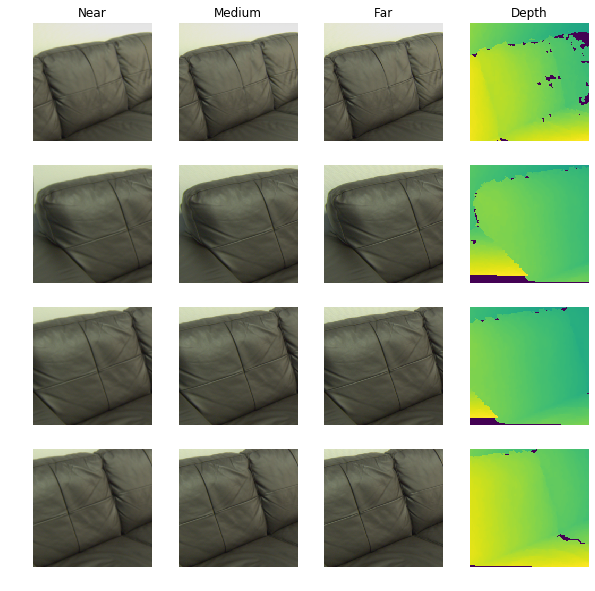

In [26]:
import data.mdff_data
from tools.vis_tools import visualize_tensors
import matplotlib.pyplot as plt
import numpy as np

def visualize_samples(data, figsize=(10, 10)):
    num_samples = 4
    vis_ids = range(0,num_samples)
    #vis_ids = range(5,5+4)
    #vis_ids = np.random.randint(len(data), size=num_samples).tolist()
    vis_fs_range = [0,4,9]

    plt.figure(figsize=figsize)
    
    fs_samples, depth_samples = [], []
    
    for i in vis_ids:
        imgs = data[i]
        fs_samples.append([imgs[0][j] for j in vis_fs_range])
        depth_samples.append(imgs[1])
        
    visualize_tensors([fs + [d] for fs, d in zip(fs_samples, depth_samples)], ["Near", "Medium", "Far", "Depth"])
    #visualize_tensors([fs + [fs[0]] for fs in fs_samples], ["Near", "Medium", "Far", "Depth"])
    
#print(val_data.valid_crops[0])
    
print("Train Data (Count: {})".format(len(train_data)))
visualize_samples(train_data)

Val Data (Count: 1318)


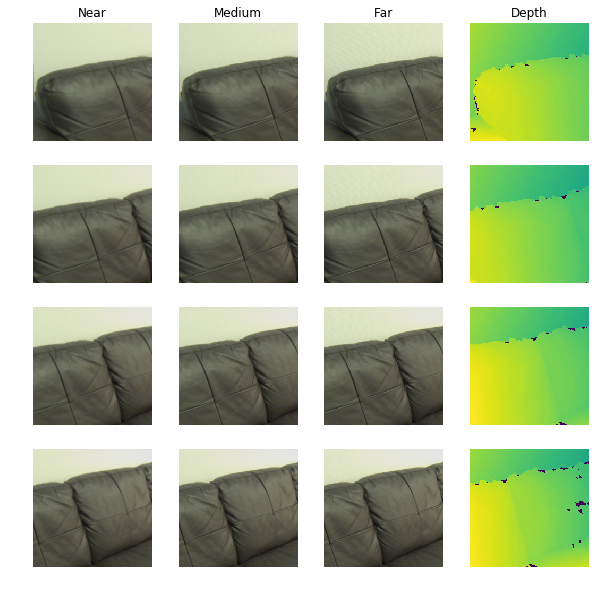

In [27]:
print("Val Data (Count: {})".format(len(val_data)))
visualize_samples(val_data)

Test Data (Count: 120)


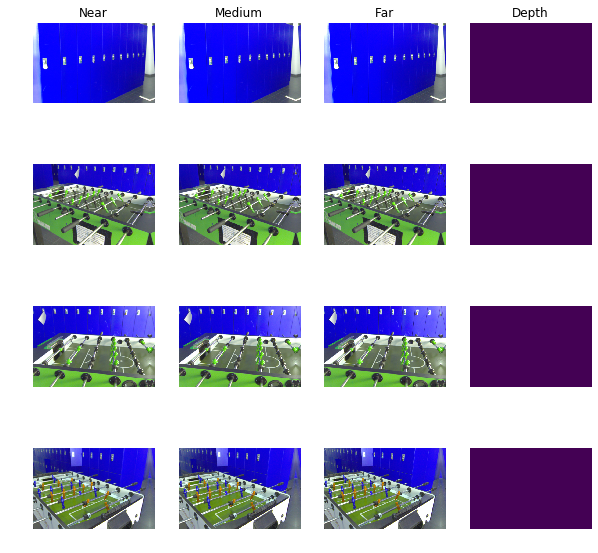

In [28]:
print("Test Data (Count: {})".format(len(test_data)))
visualize_samples(test_data)

In [8]:
"""import numpy as np

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)


ddff_net = DDFFNet(10)
ddff_net = DDFFNetDummy(10)

ddff_trainer = DDFFNetTrainer(device=device)

ddff_trainer.train(ddff_net, train_loader, val_loader, num_epochs=10, log_nth=5)"""

'import numpy as np\n\ntorch.manual_seed(0)\ntorch.cuda.manual_seed(0)\nnp.random.seed(0)\n\n\nddff_net = DDFFNet(10)\nddff_net = DDFFNetDummy(10)\n\nddff_trainer = DDFFNetTrainer(device=device)\n\nddff_trainer.train(ddff_net, train_loader, val_loader, num_epochs=10, log_nth=5)'

In [9]:
import torch.utils.data as data

train_data_small = data.Subset(train_data, range(30))
val_data_small = data.Subset(val_data, range(30))

In [10]:
import trainer.batch_train
#from common.batch_train import grid_train_dataset+
from trainer import BatchTrain
from net.ddff_net import DDFFNetDummy
import os

torch.manual_seed(0)
torch.cuda.manual_seed(0)
np.random.seed(0)

params = {
    "train": {
        "batch_size": 2,
        "num_epochs": 5,
        "optimizer": {
            "name": "Adam",
            "lr": 1e-4,
            "weight_decay": 0.0
        },
        "load_checkpoint": {
            #"model": "test_model",
            "epoch": 4
        },
        #"max_gradient": 1
    },
    "dataset": {
        "name": "MdffH5DataDbgSmall"
    },
    "net": {
        "name": "DDFFNetDummy",
        "dropout": 0.5
    },
    "logging": {
        "log_it_freq": 0,
        "log_val_freq": 1,
        "losses": ["l1", "l2"]
    },
    "save": {
        "name": "test_model",
        "mode": "all",
        "checkpoint_freq": 2
    }
}

params = BatchTrain.set_param_paths(
    params, 
    dataset_path=proj_dir("datasets"), 
    model_path=proj_dir("models", "ddff_mdff"))

batch_train = BatchTrain()

best_pass = batch_train.train(params)

START GRID TRAIN (Sat Mar 23 14:28:09 2019)
PARAM SETTING
{
    "train": {
        "batch_size": 2,
        "num_epochs": 5,
        "optimizer": {
            "name": "Adam",
            "lr": 0.0001,
            "weight_decay": 0.0
        },
        "load_checkpoint": {
            "epoch": 4
        }
    },
    "save": {
        "mode": "all",
        "checkpoint_freq": 2,
        "name": "test_model"
    },
    "net": {
        "name": "DDFFNetDummy",
        "dropout": 0.5
    },
    "dataset": {
        "name": "MdffH5DataDbgSmall"
    },
    "logging": {
        "log_it_freq": 0,
        "log_val_freq": 1,
        "losses": [
            "l1",
            "l2"
        ]
    },
    "paths": {
        "model": "../../../models/ddff_mdff",
        "data": "../../../datasets"
    }
}
TRAIN ON cuda:0
GeForce GTX 660M 2GB
Not preloading data.
Not preloading data.
Train model
DDFFNetDummy
Params = {
    "train": {
        "batch_size": 2,
        "num_epochs": 5,
        "optimizer":

AttributeError: 'Trainer' object has no attribute 'train_stats'